In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from perceptual_diff import read_exr_with_openexr, perceptual_difference_sum
import OpenEXR

In [3]:
N = 4
M = 81
lambda_min = 380
lambda_max = 780
lambda_step = 5
lambdas = np.linspace(lambda_min, lambda_max, M)

def load_spd(spd_path: str):
    df = pd.read_csv(spd_path, comment='#')
    wavelengths = df['wavelength'].to_numpy()
    values = df[' intensity'].to_numpy()

    I = np.zeros((len(lambdas), ))
    w = lambda_min
    idx = 0
    while w <= lambda_max:
        I[idx] = np.interp(w, wavelengths, values)
        # print(w, I[idx])
        w += lambda_step
        idx += 1
    return I

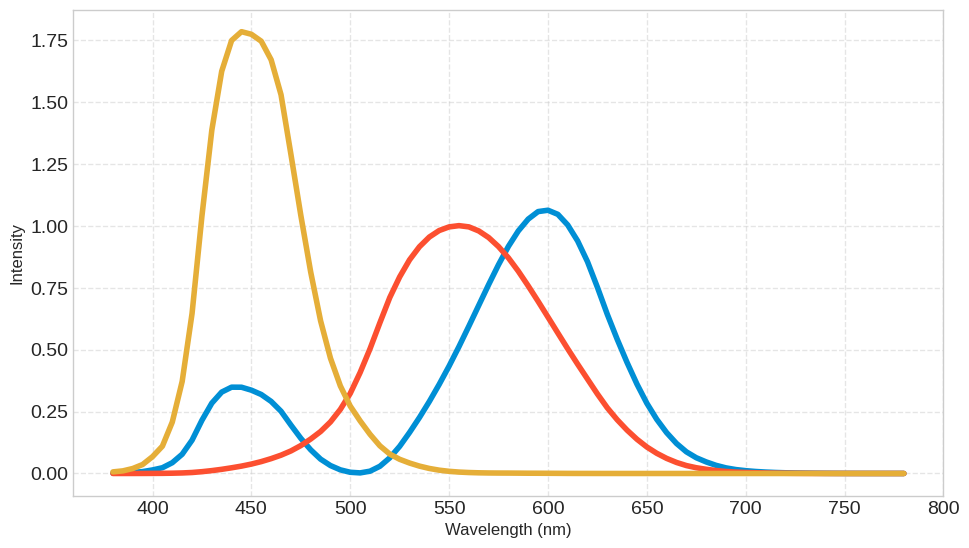

In [6]:
from colour import SpectralShape, MSDS_CMFS

cmfs = MSDS_CMFS['CIE 1931 2 Degree Standard Observer']
cmfs = cmfs.copy().align(SpectralShape(lambda_min, lambda_max, lambda_step))
x_bar, y_bar, z_bar = cmfs.values.T

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

plt.plot(lambdas, x_bar, label=r"$\bar{x}$")
plt.plot(lambdas, y_bar, label=r"$\bar{y}$")
plt.plot(lambdas, z_bar, label=r"$\bar{z}$")

# plt.title("Color matching functions")
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
# plt.xlim(380, 780)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'spd_plots/cmfs.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
illuminant_dict = {
    "A_Std": "A Standard Illuminant",
    "compact_fluorescent": "Globe Twister Compact Fluorescent",
    "D65": "D65 Standard Illuminant",
    "Philips_MH": "Philips High Bay Metal Halide",
    "Scotopic": "Scotopic Biological Sensitivity",
    "sun": "Sun SPD"
}

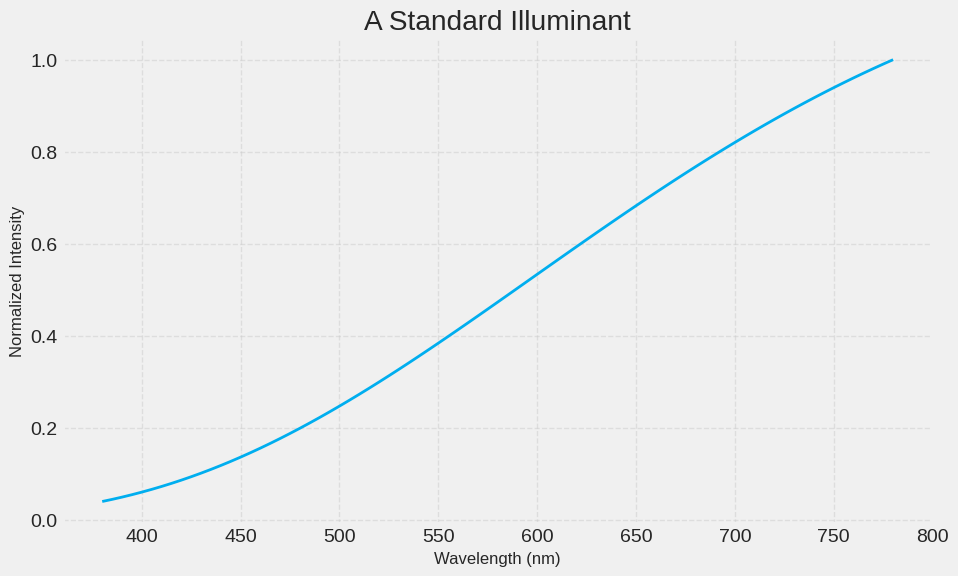

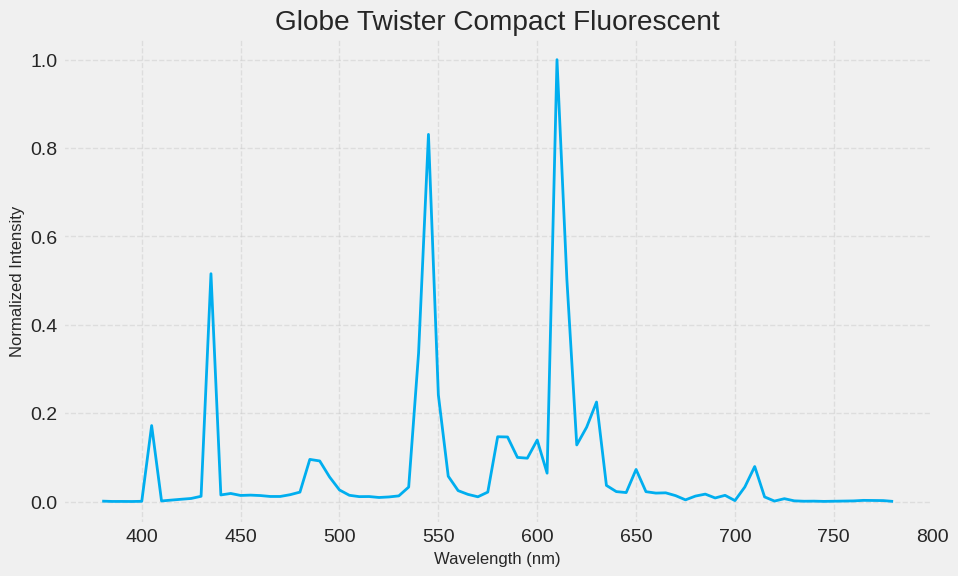

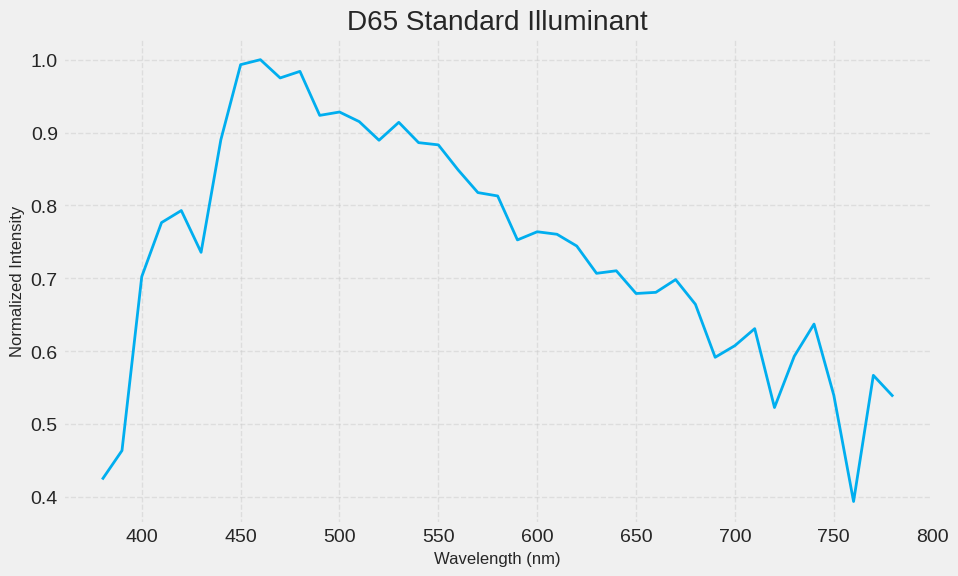

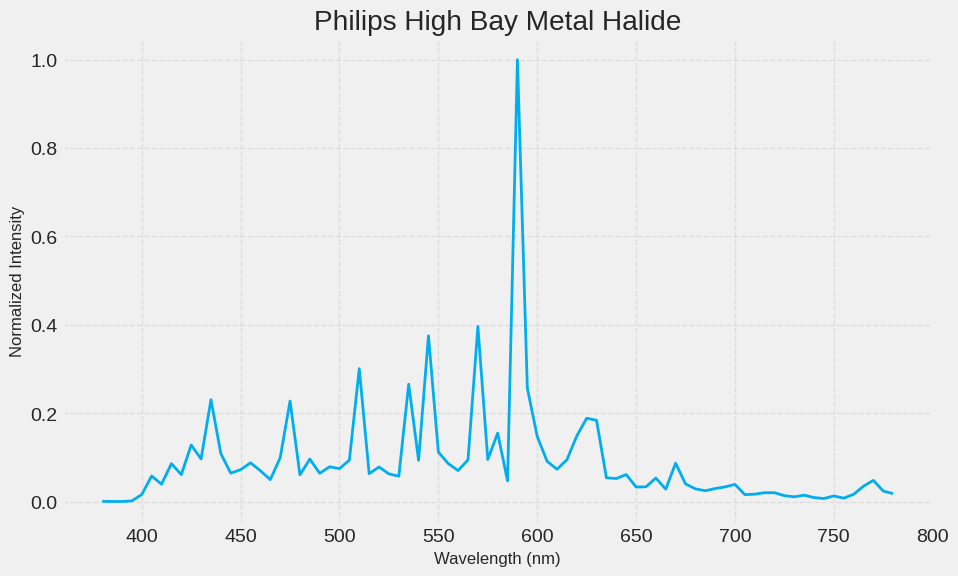

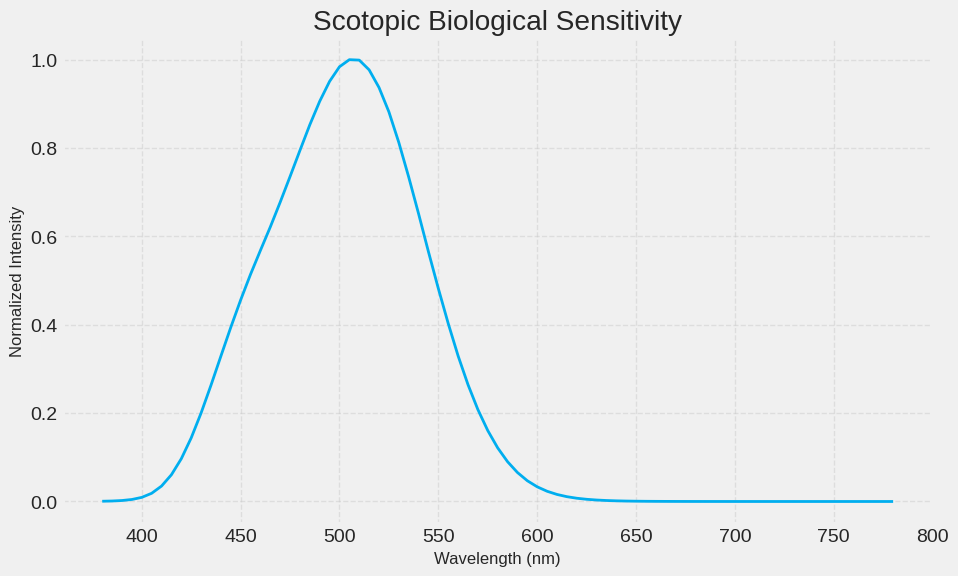

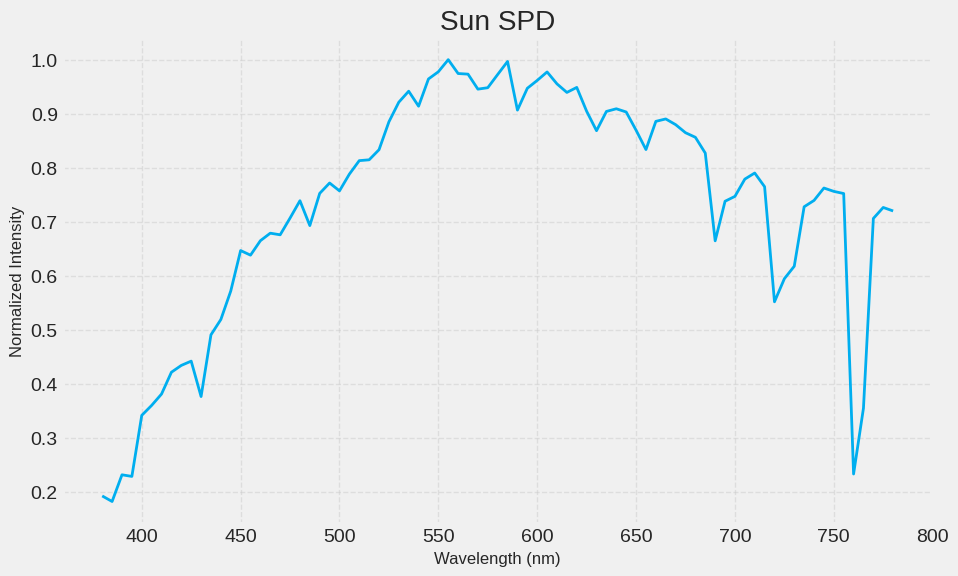

In [44]:
for k, v in illuminant_dict.items():
    I = load_spd(f"Illuminants/{k}.csv")
    I = I / np.max(I)

    # plt.style.use('seaborn-v0_8-whitegrid')
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 6))
    plt.plot(lambdas, I, linestyle='-', linewidth=2, color='#00AEEF')
    plt.title(v)
    plt.xlabel('Wavelength (nm)', fontsize=12)
    plt.ylabel('Normalized Intensity', fontsize=12)
    # plt.xlim(380, 780)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.savefig(f'spd_plots/{k}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [45]:
def no_commas(input_filename, output_filename):
    try:
        # Open the input file for reading
        with open(input_filename, 'r') as file_in:
            # Read the entire content of the file into a string
            original_content = file_in.read()

        # Use the .replace() string method to replace all commas with spaces
        modified_content = original_content.replace(',', ' ')

        # Open the output file for writing
        with open(output_filename, 'w') as file_out:
            # Write the modified content to the new file
            file_out.write(modified_content)

        print(f"Successfully created '{output_filename}' with commas replaced by spaces.")

    except FileNotFoundError:
        print(f"Error: The file '{input_filename}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [46]:
for k, v in illuminant_dict.items():
    input_filename = f"Illuminants/{k}.csv"
    output_filename = f"Illuminants/{k}_nocommas.csv"
    no_commas(input_filename, output_filename)

Successfully created 'Illuminants/A_Std_nocommas.csv' with commas replaced by spaces.
Successfully created 'Illuminants/compact_fluorescent_nocommas.csv' with commas replaced by spaces.
Successfully created 'Illuminants/D65_nocommas.csv' with commas replaced by spaces.
Successfully created 'Illuminants/Philips_MH_nocommas.csv' with commas replaced by spaces.
Successfully created 'Illuminants/Scotopic_nocommas.csv' with commas replaced by spaces.
Successfully created 'Illuminants/sun_nocommas.csv' with commas replaced by spaces.


In [47]:
illuminant_dict = {
    "A_Std": "A Standard Illuminant",
    "compact_fluorescent": "Globe Twister Compact Fluorescent",
    "D65": "D65 Standard Illuminant",
    "Philips_MH": "Philips High Bay Metal Halide",
    "Scotopic": "Scotopic Biological Sensitivity",
    "sun": "Sun SPD"
}

In [48]:
def extract_header(filename):
    exr_file = OpenEXR.InputFile(filename)
    header = exr_file.header()
    print(header.keys())
    return header["renderTimeSeconds"], header["samplesPerPixel"]

In [49]:
###############
# CORNELL BOX #
###############

# 1. Sun
theirs = "renders/cornell-box/cornell-box-theirs-sun.exr"
ours = "renders/cornell-box/cornell-box-ours-sun.exr"
ground_truth = "renders/cornell-box/cornell-box-sun-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

I = load_spd(f"Illuminants/sun.csv")
I = I / np.max(I)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/cornell-box/cornell-box-theirs-sun.exr...
Reading renders/cornell-box/cornell-box-sun-gt.exr...
Reading renders/cornell-box/cornell-box-ours-sun.exr...
Reading renders/cornell-box/cornell-box-sun-gt.exr...
dict_keys(['channels', 'compression', 'dataWindow', 'displayWindow', 'lineOrder', 'pixelAspectRatio', 'renderTimeSeconds', 'samplesPerPixel', 'screenWindowCenter', 'screenWindowWidth', 'worldToCamera', 'worldToNDC'])
dict_keys(['channels', 'compression', 'dataWindow', 'displayWindow', 'lineOrder', 'pixelAspectRatio', 'renderTimeSeconds', 'samplesPerPixel', 'screenWindowCenter', 'screenWindowWidth', 'worldToCamera', 'worldToNDC'])
dict_keys(['channels', 'compression', 'dataWindow', 'displayWindow', 'lineOrder', 'pixelAspectRatio', 'renderTimeSeconds', 'samplesPerPixel', 'screenWindowCenter', 'screenWindowWidth', 'worldToCamera', 'worldToNDC'])
Their average color difference: 0.6250482472471923
Our average color difference: 0.5764579295253877
The render of the ground tr

In [38]:
# 2. Compact Fluorescent
theirs = "renders/cornell-box/cornell-box-theirs-fluorescent-2.exr"
ours = "renders/cornell-box/cornell-box-ours-fluorescent-2.exr"
ground_truth = "renders/cornell-box/cornell-box-theirs-fluorescent-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

I = load_spd(f"Illuminants/compact_fluorescent.csv")
I = I / np.max(I)


print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/cornell-box/cornell-box-theirs-fluorescent-2.exr...
Reading renders/cornell-box/cornell-box-theirs-fluorescent-gt.exr...
Reading renders/cornell-box/cornell-box-ours-fluorescent-2.exr...
Reading renders/cornell-box/cornell-box-theirs-fluorescent-gt.exr...
Their average color difference: 2.5310654023280956
Our average color difference: 0.9702530063176413
The render of the ground truth took 617.663330078125 seconds, for 16384 samples per pixel.
Their render took 17.747987747192383 seconds, for 512 samples per pixel.
Our render took 17.140090942382812 seconds, for 512 samples per pixel.


In [39]:
# 3. Scotopic
theirs = "renders/cornell-box/cornell-box-scotopic.exr"
ours = "renders/cornell-box/cornell-box-scotopic-ours.exr"
ground_truth = "renders/cornell-box/cornell-box-scotopic-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

I = load_spd(f"Illuminants/Scotopic.csv")
I = I / np.max(I)


print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/cornell-box/cornell-box-scotopic.exr...
Reading renders/cornell-box/cornell-box-scotopic-gt.exr...
Reading renders/cornell-box/cornell-box-scotopic-ours.exr...
Reading renders/cornell-box/cornell-box-scotopic-gt.exr...
Their average color difference: 0.6189548040360798
Our average color difference: 0.45287322733683716
The render of the ground truth took 586.6237182617188 seconds, for 16384 samples per pixel.
Their render took 17.932899475097656 seconds, for 512 samples per pixel.
Our render took 17.33646583557129 seconds, for 512 samples per pixel.


In [40]:
##################
# GLASS OF WATER #
##################

# 1. A Standard Illuminant
theirs = "renders/glass-of-water/A-Std-theirs.exr"
ours = "renders/glass-of-water/A-Std-ours.exr"
ground_truth = "renders/glass-of-water/A-Std-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

I = load_spd(f"Illuminants/A_Std.csv")
I = I / np.max(I)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/glass-of-water/A-Std-theirs.exr...
Reading renders/glass-of-water/A-Std-gt.exr...
Reading renders/glass-of-water/A-Std-ours.exr...
Reading renders/glass-of-water/A-Std-gt.exr...
Their average color difference: 1.9519911021252097
Our average color difference: 1.727977707602253
The render of the ground truth took 620.6976318359375 seconds, for 16384 samples per pixel.
Their render took 19.17804718017578 seconds, for 512 samples per pixel.
Our render took 19.372974395751953 seconds, for 512 samples per pixel.
Their average color difference: 1.9519911021252097
Our average color difference: 1.727977707602253
The render of the ground truth took 620.6976318359375 seconds, for 16384 samples per pixel.
Their render took 19.17804718017578 seconds, for 512 samples per pixel.
Our render took 19.372974395751953 seconds, for 512 samples per pixel.


In [41]:
# 1b. A Standard Illuminant Low SPP - 256
theirs = "renders/glass-of-water/A-Std-theirs-low.exr"
ours = "renders/glass-of-water/A-Std-ours-low.exr"
ground_truth = "renders/glass-of-water/A-Std-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/glass-of-water/A-Std-theirs-low.exr...
Reading renders/glass-of-water/A-Std-gt.exr...
Reading renders/glass-of-water/A-Std-ours-low.exr...
Reading renders/glass-of-water/A-Std-gt.exr...
Their average color difference: 2.7037826701580903
Our average color difference: 2.408215842287425
The render of the ground truth took 620.6976318359375 seconds, for 16384 samples per pixel.
Their render took 9.95284366607666 seconds, for 256 samples per pixel.
Our render took 9.761585235595703 seconds, for 256 samples per pixel.


In [42]:
# 2. D65 Standard Illuminant
theirs = "renders/glass-of-water/D65-theirs.exr"
ours = "renders/glass-of-water/D65-ours.exr"
ground_truth = "renders/glass-of-water/D65-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/glass-of-water/D65-theirs.exr...
Reading renders/glass-of-water/D65-gt.exr...
Reading renders/glass-of-water/D65-ours.exr...
Reading renders/glass-of-water/D65-gt.exr...
Their average color difference: 1.6659011297712323
Our average color difference: 1.7854082890627676
The render of the ground truth took 624.670654296875 seconds, for 16384 samples per pixel.
Their render took 19.564550399780273 seconds, for 512 samples per pixel.
Our render took 19.39727020263672 seconds, for 512 samples per pixel.


In [43]:
# 2b. D65 Standard Illuminant Low SPP - 255
theirs = "renders/glass-of-water/D65-theirs-low.exr"
ours = "renders/glass-of-water/D65-ours-low.exr"
ground_truth = "renders/glass-of-water/D65-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/glass-of-water/D65-theirs-low.exr...
Reading renders/glass-of-water/D65-gt.exr...
Reading renders/glass-of-water/D65-ours-low.exr...
Reading renders/glass-of-water/D65-gt.exr...
Their average color difference: 2.3053632659332304
Our average color difference: 2.3918271164082676
The render of the ground truth took 624.670654296875 seconds, for 16384 samples per pixel.
Their render took 9.964418411254883 seconds, for 256 samples per pixel.
Our render took 9.969765663146973 seconds, for 256 samples per pixel.


In [44]:
# 3. Compact Fluorescent
theirs = "renders/glass-of-water/fluorescent-theirs.exr"
ours = "renders/glass-of-water/fluorescent-ours.exr"
ground_truth = "renders/glass-of-water/fluorescent-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/glass-of-water/fluorescent-theirs.exr...
Reading renders/glass-of-water/fluorescent-gt.exr...
Reading renders/glass-of-water/fluorescent-ours.exr...
Reading renders/glass-of-water/fluorescent-gt.exr...
Their average color difference: 5.6760811447276085
Our average color difference: 2.2335533176143016
The render of the ground truth took 616.6782836914062 seconds, for 16384 samples per pixel.
Their render took 19.569974899291992 seconds, for 512 samples per pixel.
Our render took 19.1662654876709 seconds, for 512 samples per pixel.


In [45]:
# 3. Compact Fluorescent Low SPP - 256
theirs = "renders/glass-of-water/fluorescent-theirs-low.exr"
ours = "renders/glass-of-water/fluorescent-ours-low.exr"
ground_truth = "renders/glass-of-water/fluorescent-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/glass-of-water/fluorescent-theirs-low.exr...
Reading renders/glass-of-water/fluorescent-gt.exr...
Reading renders/glass-of-water/fluorescent-ours-low.exr...
Reading renders/glass-of-water/fluorescent-gt.exr...
Their average color difference: 7.224408424109346
Our average color difference: 2.8654110029591195
The render of the ground truth took 616.6782836914062 seconds, for 16384 samples per pixel.
Their render took 9.778894424438477 seconds, for 256 samples per pixel.
Our render took 9.568402290344238 seconds, for 256 samples per pixel.


In [46]:
#############
# STAIRCASE #
#############

# 1. D65 Standard Illuminant
theirs = "renders/staircase/D65-theirs.exr"
ours = "renders/staircase/D65-ours.exr"
ground_truth = "renders/staircase/D65-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/staircase/D65-theirs.exr...
Reading renders/staircase/D65-gt.exr...
Reading renders/staircase/D65-ours.exr...
Reading renders/staircase/D65-gt.exr...
Their average color difference: 0.3524942583666437
Our average color difference: 0.35455951291359106
The render of the ground truth took 848.7092895507812 seconds, for 16384 samples per pixel.
Their render took 26.21781349182129 seconds, for 512 samples per pixel.
Our render took 26.189960479736328 seconds, for 512 samples per pixel.


In [47]:
# 1b. D65 Standard Illuminant Low SPP - 256
theirs = "renders/staircase/D65-theirs-low.exr"
ours = "renders/staircase/D65-ours-low.exr"
ground_truth = "renders/staircase/D65-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/staircase/D65-theirs-low.exr...
Reading renders/staircase/D65-gt.exr...
Reading renders/staircase/D65-ours-low.exr...
Reading renders/staircase/D65-gt.exr...
Their average color difference: 0.4806954352388525
Our average color difference: 0.4808816261415555
The render of the ground truth took 848.7092895507812 seconds, for 16384 samples per pixel.
Their render took 13.360401153564453 seconds, for 256 samples per pixel.
Our render took 12.984289169311523 seconds, for 256 samples per pixel.


In [48]:
# 1c. D65 Standard Illuminant High SPP - 1024
theirs = "renders/staircase/D65-theirs-1kspp.exr"
ours = "renders/staircase/D65-ours-1kspp.exr"
ground_truth = "renders/staircase/D65-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/staircase/D65-theirs-1kspp.exr...
Reading renders/staircase/D65-gt.exr...
Reading renders/staircase/D65-ours-1kspp.exr...
Reading renders/staircase/D65-gt.exr...
Their average color difference: 0.256539776319979
Our average color difference: 0.25903553589726275
The render of the ground truth took 848.7092895507812 seconds, for 16384 samples per pixel.
Their render took 53.20882797241211 seconds, for 1024 samples per pixel.
Our render took 51.80539321899414 seconds, for 1024 samples per pixel.


In [49]:
# 2. Philips High Bay
theirs = "renders/staircase/philips-high-bay-theirs.exr"
ours = "renders/staircase/philips-high-bay-ours.exr"
ground_truth = "renders/staircase/philips-high-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/staircase/philips-high-bay-theirs.exr...
Reading renders/staircase/philips-high-gt.exr...
Reading renders/staircase/philips-high-bay-ours.exr...
Reading renders/staircase/philips-high-gt.exr...
Their average color difference: 0.3791366759340591
Our average color difference: 0.19078548918458585
The render of the ground truth took 853.7202758789062 seconds, for 16384 samples per pixel.
Their render took 26.582687377929688 seconds, for 512 samples per pixel.
Our render took 25.56791114807129 seconds, for 512 samples per pixel.


In [50]:
# 2b. Philips High Bay Low SPP - 256
theirs = "renders/staircase/philips-high-bay-theirs-low.exr"
ours = "renders/staircase/philips-high-bay-ours-low.exr"
ground_truth = "renders/staircase/philips-high-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/staircase/philips-high-bay-theirs-low.exr...
Reading renders/staircase/philips-high-gt.exr...
Reading renders/staircase/philips-high-bay-ours-low.exr...
Reading renders/staircase/philips-high-gt.exr...
Their average color difference: 0.5125781958079945
Our average color difference: 0.2523541296246074
The render of the ground truth took 853.7202758789062 seconds, for 16384 samples per pixel.
Their render took 13.361286163330078 seconds, for 256 samples per pixel.
Our render took 12.771956443786621 seconds, for 256 samples per pixel.


In [54]:
# 2c. Philips High Bay High SPP - 1024
theirs = "renders/staircase/philips-high-bay-theirs-1kspp.exr"
ours = "renders/staircase/philips-high-bay-ours-1kspp.exr"
ground_truth = "renders/staircase/philips-high-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/staircase/philips-high-bay-theirs-1kspp.exr...
Reading renders/staircase/philips-high-gt.exr...
Reading renders/staircase/philips-high-bay-ours-1kspp.exr...
Reading renders/staircase/philips-high-gt.exr...
Their average color difference: 0.27811841612823796
Our average color difference: 0.14615516234979217
The render of the ground truth took 853.7202758789062 seconds, for 16384 samples per pixel.
Their render took 52.584373474121094 seconds, for 1024 samples per pixel.
Our render took 50.6722526550293 seconds, for 1024 samples per pixel.


In [55]:
##########
# TEAPOT #
##########

# 1. Compact Fluorescent
theirs = "renders/teapot/fluorescent-theirs.exr"
ours = "renders/teapot/fluorescent-ours.exr"
ground_truth = "renders/teapot/fluorescent-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/teapot/fluorescent-theirs.exr...
Reading renders/teapot/fluorescent-gt.exr...
Reading renders/teapot/fluorescent-ours.exr...
Reading renders/teapot/fluorescent-gt.exr...
Their average color difference: 1.9999318606760406
Our average color difference: 0.6966612055646147
The render of the ground truth took 490.745849609375 seconds, for 16384 samples per pixel.
Their render took 15.392640113830566 seconds, for 512 samples per pixel.
Our render took 15.3583984375 seconds, for 512 samples per pixel.


In [56]:
# 1b. Compact Fluorescent Low SPP - 256
theirs = "renders/teapot/fluorescent-theirs-low.exr"
ours = "renders/teapot/fluorescent-ours-low.exr"
ground_truth = "renders/teapot/fluorescent-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/teapot/fluorescent-theirs-low.exr...
Reading renders/teapot/fluorescent-gt.exr...
Reading renders/teapot/fluorescent-ours-low.exr...
Reading renders/teapot/fluorescent-gt.exr...
Their average color difference: 3.0134965305019734
Our average color difference: 0.9684915276029851
The render of the ground truth took 490.745849609375 seconds, for 16384 samples per pixel.
Their render took 7.782342910766602 seconds, for 256 samples per pixel.
Our render took 7.757802963256836 seconds, for 256 samples per pixel.


In [57]:
# 2. Sun
theirs = "renders/teapot/sun-theirs.exr"
ours = "renders/teapot/sun-ours.exr"
ground_truth = "renders/teapot/sun-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/teapot/sun-theirs.exr...
Reading renders/teapot/sun-gt.exr...
Reading renders/teapot/sun-ours.exr...
Reading renders/teapot/sun-gt.exr...
Their average color difference: 0.752629206298115
Our average color difference: 0.6121289633901456
The render of the ground truth took 498.7077941894531 seconds, for 16384 samples per pixel.
Their render took 15.36559772491455 seconds, for 512 samples per pixel.
Our render took 15.394807815551758 seconds, for 512 samples per pixel.


In [58]:
# 2b. Sun Low SPP - 256
theirs = "renders/teapot/sun-theirs-low.exr"
ours = "renders/teapot/sun-ours-low.exr"
ground_truth = "renders/teapot/sun-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/teapot/sun-theirs-low.exr...
Reading renders/teapot/sun-gt.exr...
Reading renders/teapot/sun-ours-low.exr...
Reading renders/teapot/sun-gt.exr...
Their average color difference: 1.0463608746659046
Our average color difference: 0.8339933669120208
The render of the ground truth took 498.7077941894531 seconds, for 16384 samples per pixel.
Their render took 7.778872013092041 seconds, for 256 samples per pixel.
Our render took 7.782752990722656 seconds, for 256 samples per pixel.


In [59]:
#####################
# VEACH Bidir Room #
#####################

# 1. Compact Fluorescent
theirs = "renders/veach-bidir/fluorescent-theirs.exr"
ours = "renders/veach-bidir/fluorescent-ours.exr"
ground_truth = "renders/veach-bidir/fluorescent-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-bidir/fluorescent-theirs.exr...
Reading renders/veach-bidir/fluorescent-gt.exr...
Reading renders/veach-bidir/fluorescent-ours.exr...
Reading renders/veach-bidir/fluorescent-gt.exr...
Their average color difference: 2.858770816585746
Our average color difference: 0.8240718931709711
The render of the ground truth took 2710.96044921875 seconds, for 131072 samples per pixel.
Their render took 10.756155967712402 seconds, for 512 samples per pixel.
Our render took 10.75040340423584 seconds, for 512 samples per pixel.


In [60]:
# 1b. Compact Fluorescent High SPP - 2048
theirs = "renders/veach-bidir/fluorescent-theirs-2kspp.exr"
ours = "renders/veach-bidir/fluorescent-ours-2kspp.exr"
ground_truth = "renders/veach-bidir/fluorescent-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-bidir/fluorescent-theirs-2kspp.exr...
Reading renders/veach-bidir/fluorescent-gt.exr...
Reading renders/veach-bidir/fluorescent-ours-2kspp.exr...
Reading renders/veach-bidir/fluorescent-gt.exr...
Their average color difference: 1.5810799191156342
Our average color difference: 0.4925138987527941
The render of the ground truth took 2710.96044921875 seconds, for 131072 samples per pixel.
Their render took 42.38217544555664 seconds, for 2048 samples per pixel.
Our render took 42.164676666259766 seconds, for 2048 samples per pixel.


In [61]:
#############
# VEACH MIS #
#############

# 1. A Standard Illuminant
theirs = "renders/veach-mis/A-standard-theirs.exr"
ours = "renders/veach-mis/A-standard-ours.exr"
ground_truth = "renders/veach-mis/A-standard-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-mis/A-standard-theirs.exr...
Reading renders/veach-mis/A-standard-gt.exr...
Reading renders/veach-mis/A-standard-ours.exr...
Reading renders/veach-mis/A-standard-gt.exr...
Their average color difference: 0.4428644180789937
Our average color difference: 0.4126770049549366
The render of the ground truth took 273.6576843261719 seconds, for 16384 samples per pixel.
Their render took 8.562054634094238 seconds, for 512 samples per pixel.
Our render took 8.546968460083008 seconds, for 512 samples per pixel.


In [62]:
# 1b. A Standard Illuminant Low SPP - 256
theirs = "renders/veach-mis/A-standard-theirs-low.exr"
ours = "renders/veach-mis/A-standard-ours-low.exr"
ground_truth = "renders/veach-mis/A-standard-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-mis/A-standard-theirs-low.exr...
Reading renders/veach-mis/A-standard-gt.exr...
Reading renders/veach-mis/A-standard-ours-low.exr...
Reading renders/veach-mis/A-standard-gt.exr...
Their average color difference: 0.7453773430291795
Our average color difference: 0.7141497009323656
The render of the ground truth took 273.6576843261719 seconds, for 16384 samples per pixel.
Their render took 4.256038188934326 seconds, for 256 samples per pixel.
Our render took 4.344147205352783 seconds, for 256 samples per pixel.


In [63]:
# 2. Philips High Bay
theirs = "renders/veach-mis/philips-high-bay-theirs.exr"
ours = "renders/veach-mis/philips-high-bay-ours.exr"
ground_truth = "renders/veach-mis/philips-high-bay-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-mis/philips-high-bay-theirs.exr...
Reading renders/veach-mis/philips-high-bay-gt.exr...
Reading renders/veach-mis/philips-high-bay-ours.exr...
Reading renders/veach-mis/philips-high-bay-gt.exr...
Their average color difference: 0.8455268520211529
Our average color difference: 0.3579532517898684
The render of the ground truth took 273.6404724121094 seconds, for 16384 samples per pixel.
Their render took 8.554505348205566 seconds, for 512 samples per pixel.
Our render took 8.555434226989746 seconds, for 512 samples per pixel.


In [64]:
# 2b. Philips High Bay Low SPP - 256
theirs = "renders/veach-mis/philips-high-bay-theirs-low.exr"
ours = "renders/veach-mis/philips-high-bay-ours-low.exr"
ground_truth = "renders/veach-mis/philips-high-bay-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-mis/philips-high-bay-theirs-low.exr...
Reading renders/veach-mis/philips-high-bay-gt.exr...
Reading renders/veach-mis/philips-high-bay-ours-low.exr...
Reading renders/veach-mis/philips-high-bay-gt.exr...
Their average color difference: 1.1687422657310764
Our average color difference: 0.6046262285109854
The render of the ground truth took 273.6404724121094 seconds, for 16384 samples per pixel.
Their render took 4.2560248374938965 seconds, for 256 samples per pixel.
Our render took 4.2489848136901855 seconds, for 256 samples per pixel.


In [65]:
# 3. Sun
theirs = "renders/veach-mis/sun-theirs.exr"
ours = "renders/veach-mis/sun-ours.exr"
ground_truth = "renders/veach-mis/sun-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-mis/sun-theirs.exr...
Reading renders/veach-mis/sun-gt.exr...
Reading renders/veach-mis/sun-ours.exr...
Reading renders/veach-mis/sun-gt.exr...
Their average color difference: 0.3537366061429609
Our average color difference: 0.3207075389642594
The render of the ground truth took 274.63134765625 seconds, for 16384 samples per pixel.
Their render took 8.55261516571045 seconds, for 512 samples per pixel.
Our render took 8.556038856506348 seconds, for 512 samples per pixel.


In [66]:
# 3b. Sun Low SPP - 256
theirs = "renders/veach-mis/sun-theirs-low.exr"
ours = "renders/veach-mis/sun-ours-low.exr"
ground_truth = "renders/veach-mis/sun-gt.exr"
their_avg, their_median = perceptual_difference_sum(theirs, ground_truth)
our_avg, our_median = perceptual_difference_sum(ours, ground_truth)
their_render, their_spp = extract_header(theirs)
our_render, our_spp = extract_header(ours)
gt_render, gt_spp = extract_header(ground_truth)

print(f"Their average color difference: {their_avg}")
print(f"Our average color difference: {our_avg}")
print(f"The render of the ground truth took {gt_render} seconds, for {gt_spp} samples per pixel.")
print(f"Their render took {their_render} seconds, for {their_spp} samples per pixel.")
print(f"Our render took {our_render} seconds, for {our_spp} samples per pixel.")

Reading renders/veach-mis/sun-theirs-low.exr...
Reading renders/veach-mis/sun-gt.exr...
Reading renders/veach-mis/sun-ours-low.exr...
Reading renders/veach-mis/sun-gt.exr...
Their average color difference: 0.6128038662264983
Our average color difference: 0.5619637860105844
The render of the ground truth took 274.63134765625 seconds, for 16384 samples per pixel.
Their render took 4.341383934020996 seconds, for 256 samples per pixel.
Our render took 4.440363883972168 seconds, for 256 samples per pixel.


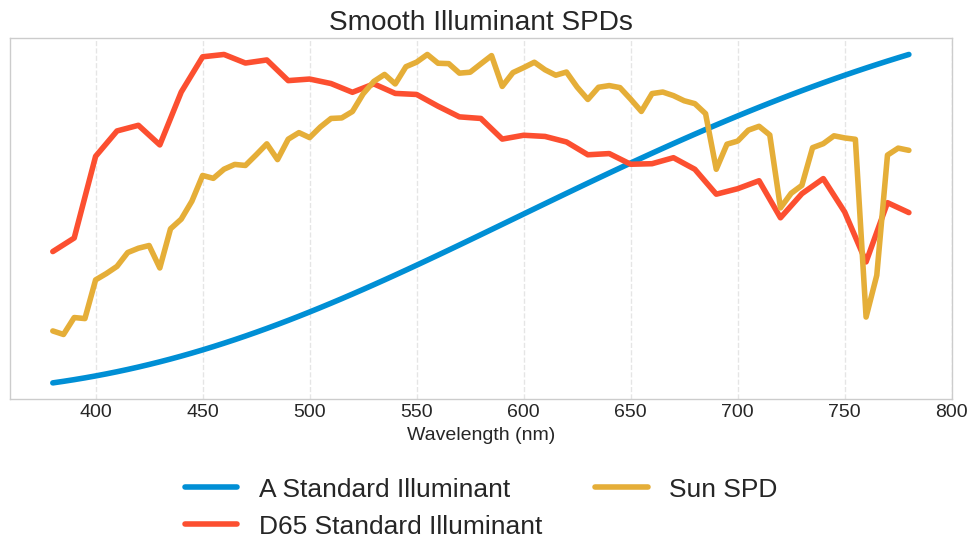

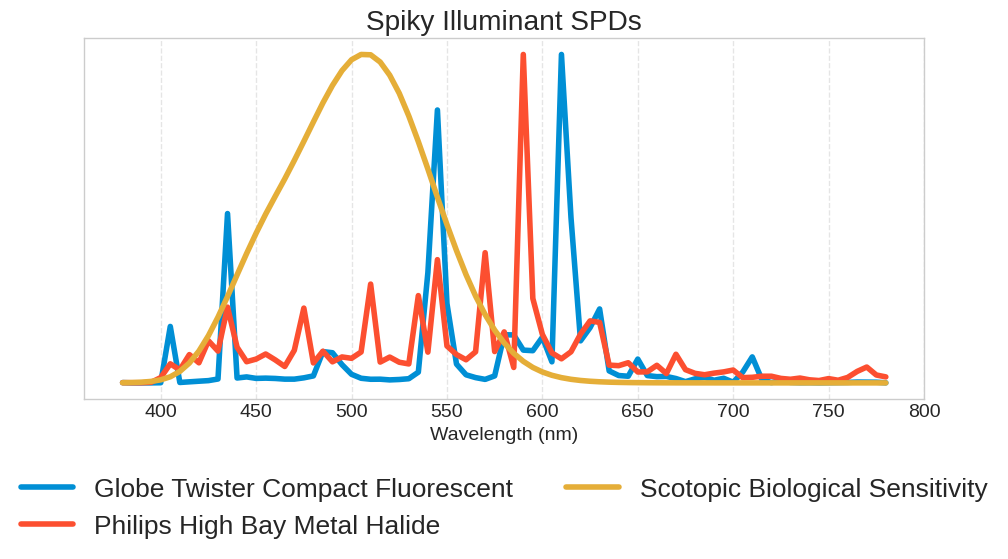

In [38]:
stable_illuminants = {
    "A_Std": "A Standard Illuminant",
    "D65": "D65 Standard Illuminant",
    "sun": "Sun SPD"
}

spiky_illuminants = {
    "compact_fluorescent": "Globe Twister Compact Fluorescent",
    "Philips_MH": "Philips High Bay Metal Halide",
    "Scotopic": "Scotopic Biological Sensitivity",
}

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Smooth Illuminant SPDs")
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Normalized Intensity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

for k, v in stable_illuminants.items():
    I = load_spd(f"Illuminants/{k}.csv")
    I = I / np.max(I)
    plt.plot(lambdas, I, label=v)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False,
    fontsize=19  # use 12 or higher for print readability
)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("spd_plots/stable_illum.png", dpi=300)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Spiky Illuminant SPDs")
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Normalized Intensity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

for k, v in spiky_illuminants.items():
    I = load_spd(f"Illuminants/{k}.csv")
    I = I / np.max(I)
    plt.plot(lambdas, I, label=v)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False,
    fontsize=19  # use 12 or higher for print readability
)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("spd_plots/spiky_illum.png", dpi=300)
plt.show()

# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(10, 6))
# plt.title("Stable Illuminant SPDs")
# plt.xlabel('Wavelength (nm)', fontsize=12)
# plt.ylabel('Normalized Intensity', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)
# for k, v in stable_illuminants.items():
#     I = load_spd(f"Illuminants/{k}.csv")
#     I = I / np.max(I)
#     plt.plot(lambdas, I, label=f'{k}')
#
# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(10, 6))
# plt.title("Illuminant SPDs")
# plt.xlabel('Wavelength (nm)', fontsize=12)
# plt.ylabel('Normalized Intensity', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)
# for k, v in spiky_illuminants.items():
#     I = load_spd(f"Illuminants/{k}.csv")
#     I = I / np.max(I)
#     plt.plot(lambdas, I, label=f'{k}')
